In [70]:
import matplotlib.pyplot as plt
import cmasher as cmr
import numpy as np
import h5py

In [71]:
# set style
plt.style.use('../../matplotlibrc.txt')

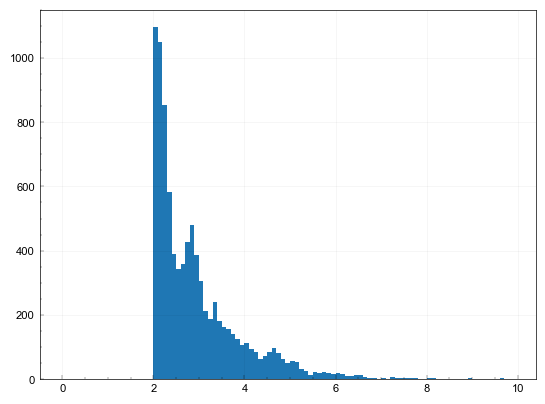

-322.49637 11.379515
1026
9012
[ 992.04720882 1161.68740806  984.99364647 ... 1006.09114285  930.89841112
  967.77563959] Myr


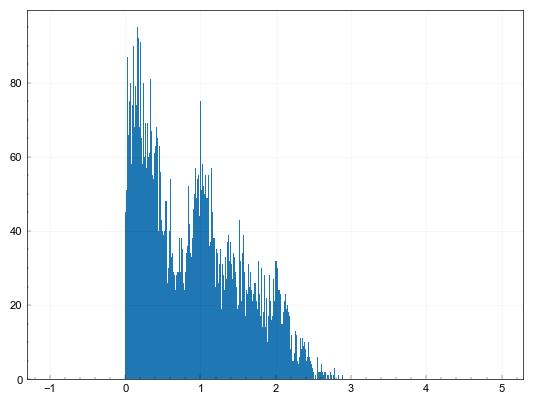

In [72]:

h = 0.7

from astropy.cosmology import Planck13 as cosmo
from unyt import Myr

id = '107743'
filename = 'cutout_107743.hdf5'

with h5py.File(filename) as f:

    formation_scale_factor = f['PartType4']['GFM_StellarFormationTime'][()]
    formation_redshift = 1/formation_scale_factor - 1.0
    
    plt.hist(formation_redshift, bins = np.arange(0., 10., 0.1))
    plt.show()

    print(np.min(formation_redshift), np.max(formation_redshift))
    print(np.sum(formation_redshift<0.0))
    print(np.sum(formation_redshift>2.0))

    # only select star particles that make sense
    s = formation_redshift>=2.0
    formation_redshift = formation_redshift[s]

    ages = (cosmo.age(z=2)-cosmo.age(formation_redshift)).to('Myr').value * Myr
    print(ages)

    plt.hist(ages.to('Gyr').value, bins = np.arange(-1., 5., 0.01))
    plt.show()

    initial_masses = f['PartType4']['GFM_InitialMass'][s] * 1E10 / h
    metallicities = f['PartType4']['GFM_Metallicity'][s]
    



Create a 2D histogram of the age and metallicity

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/3516392299.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(ages), np.log10(metallicities),c='k',alpha=0.1,s=1)
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/3516392299.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(np.log10(ages), np.log10(metallicities),c='k',alpha=0.1,s=1)


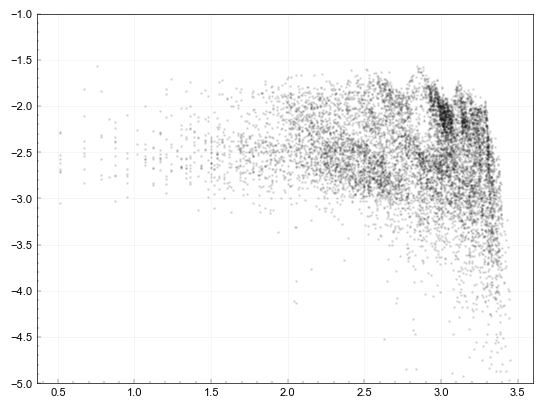

In [73]:
plt.scatter(np.log10(ages), np.log10(metallicities),c='k',alpha=0.1,s=1)
plt.ylim([-5, -1.])
plt.show()

/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/976296118.py:7: RuntimeWarning: divide by zero encountered in log10
  np.log10(metallicities),
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/976296118.py:7: RuntimeWarning: invalid value encountered in log10
  np.log10(metallicities),


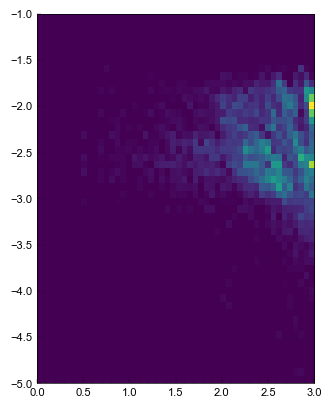

In [74]:

log10age_range = [0., 3.]
log10metallicity_range = [-5., -1.]

nbins = 50

hist, xedges, yedges = np.histogram2d(np.log10(ages), 
                                      np.log10(metallicities), 
                                      bins=[nbins,nbins], 
                                      range=[log10age_range, log10metallicity_range],
                                      weights=initial_masses)

plt.imshow(hist.T, origin='lower', interpolation='nearest', extent=[*log10age_range, *log10metallicity_range])
plt.show()



/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/974501550.py:19: RuntimeWarning: divide by zero encountered in log10
  np.log10(metallicities),
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/974501550.py:19: RuntimeWarning: invalid value encountered in log10
  np.log10(metallicities),
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/974501550.py:25: RuntimeWarning: divide by zero encountered in log10
  axy.hist(np.log10(metallicities), bins=nbins, range=log10metallicity_range, weights=initial_masses, orientation='horizontal',color='0.5')
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/974501550.py:25: RuntimeWarning: invalid value encountered in log10
  axy.hist(np.log10(metallicities), bins=nbins, range=log10metallicity_range, weights=initial_masses, orientation='horizontal',color='0.5')
/var/folders/1r/dyc06cz53k1g87b17q09by98000ft2/T/ipykernel_50267/974501550.py:47: UserWarning: FigureCanvasAgg is non-interactive, a

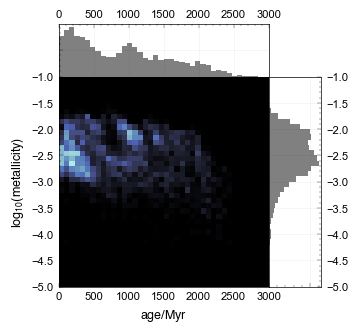

In [81]:

cmap = cmr.sapphire
age_range = [0., 3000.]
log10metallicity_range = [-5., -1.]
nbins = 40

fig = plt.figure(figsize=(3.5, 3.5))

bottom = 0.15
height = 0.6
hsize = 0.15
left = 0.15
width = 0.6

ax = fig.add_axes((left, bottom, width, height))
axx = fig.add_axes((left, bottom+height, width, hsize))
axy = fig.add_axes((left+width, bottom, hsize, height))

hist, xedges, yedges = np.histogram2d(ages.to('Myr').value, 
                                      np.log10(metallicities), 
                                      bins=[nbins,nbins], 
                                      range=[age_range, log10metallicity_range],
                                      weights=initial_masses)

axx.hist(ages.to('Myr').value, bins=nbins, range=age_range, weights=initial_masses,color='0.5')
axy.hist(np.log10(metallicities), bins=nbins, range=log10metallicity_range, weights=initial_masses, orientation='horizontal',color='0.5')

ax.imshow(hist.T, 
           origin='lower', 
           interpolation='nearest', 
           extent=[*age_range, *log10metallicity_range],
           aspect='auto',
           cmap=cmap)


axx.set_xlim(age_range)
axx.set_yticklabels([])
axx.xaxis.set_ticks_position('top')

axy.set_ylim(log10metallicity_range)
axy.set_xticklabels([])
axy.yaxis.set_ticks_position('right')

ax.set_xlabel(r'$\rm age/Myr$')
ax.set_ylabel(r'$\rm log_{10}(metallicity)$')

fig.savefig('tng-age_metallicity.pdf')
fig.show()

In [ ]:
from synthesizer.grid import Grid
from synthesizer.particle import Stars, Gas, Galaxy

Initialise stars object

In [ ]:
stars = Stars(initial_masses=initial_masses,
            ages=ages,
            metallicities=metallicities,
            )

galaxy = Galaxy(stars=stars)


/Users/sw376/Dropbox/Research/projects/synthesizer/src/synthesizer/particle/stars.py:215: RuntimeWarning: divide by zero encountered in log10
  self.log10metallicities = np.log10(self.metallicities)
/Users/sw376/Dropbox/Research/projects/synthesizer/src/synthesizer/particle/stars.py:215: RuntimeWarning: invalid value encountered in log10
  self.log10metallicities = np.log10(self.metallicities)


Calculate SED

In [ ]:
grid_dir = '/Users/sw376/Dropbox/Research/data/synthesizer/grids/'
grid_name = 'bpass-2.2.1-bin_chabrier03-0.1,300.0'
grid_name = 'bc03-2016-BaSeL_chabrier-0.1,100_cloudy-c23.01-sps-c17.03'
grid = Grid(grid_name, grid_dir=grid_dir, read_spectra=False)

In [ ]:

from synthesizer.line import LineRatios

# diagram_id = 'BPT-NII'
# line_ids = LineRatios().diagrams[diagram_id]
# print(line_ids)

line_ids = ['N 2 6583.45A', 'H 1 6564.62A', 'O 3 5006.84A', 'H 1 4862.69A']

In [ ]:
lines = galaxy.stars.get_particle_line_intrinsic(grid, line_ids)




ValueError: operands could not be broadcast together with shapes (221,7) (9012,) 